In [1]:
from gcsa.event import Event
from gcsa.google_calendar import GoogleCalendar
from gcsa.recurrence import Recurrence, DAILY, SU, SA

import plotly.express as px
import plotly.graph_objects as go

import pandas as pd

from datetime import datetime, timedelta, date
import dateutil
from dateutil.parser import parse
import calendar
import numpy as np
from circle_cal.model import CalendarElement
import circle_cal as cc
import circle_cal.model as model
import pathlib
from rich import print
import pytz
from pytz import timezone

In [2]:
cred = pathlib.Path('/Users/kdavis10/.config/.credentials')
cred_json = "pygooglecal.apps.googleusercontent.com.json"

try:
    gcal = GoogleCalendar('keithwdavis@gmail.com',
                          credentials_path=cred / cred_json)
except Exception as e:
    (cred / "token.pickle").unlink()

In [3]:
y24 = CalendarElement(year=2024)
len(list(y24.recursive_iteration("day")))

366

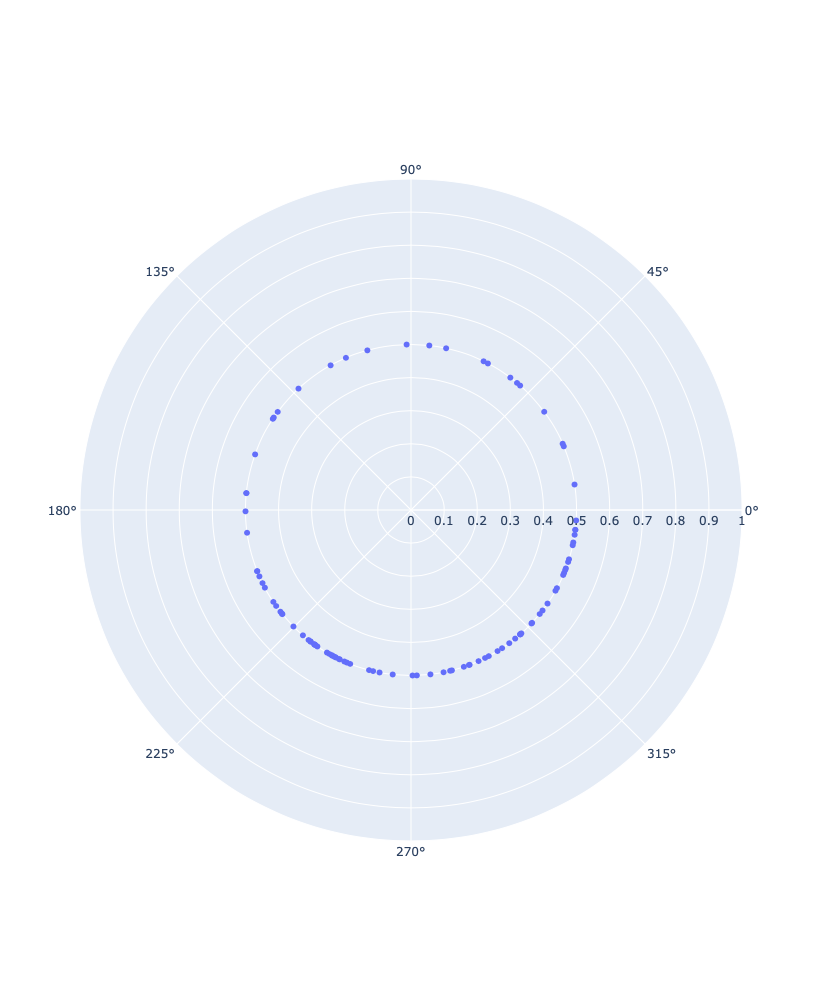

In [7]:
y24 = CalendarElement(year=2024)

eve = gcal.get_events(y24.start.datetime(), y24.stop.datetime(), single_events=True)
eve = [model.EventWrap(ev) for ev in eve if (ev.end - ev.start) / timedelta(days=1) <=1]

def make_point_trace(events, d_to_th):
    r = []
    theta = []
    text = []
    for eve in events:
        r.append(.5)
        theta.append(model.to_theta(eve.mid))
        text.append(str(eve.mid))
        
    t = go.Scatterpolar(r=r, theta=theta, mode="markers",
                        hovertext=[text]
                       )
    return t

t = make_point_trace(eve, 366 / 360)
fig = go.Figure(data=t)
fig.update_layout(height=1000)
fig.update_polars(radialaxis_range=[0, 1])
fig.show()


    
    

In [ ]:
eve[0].duration

In [8]:
model.EventWrap(eve)

RecursionError: maximum recursion depth exceeded

In [61]:
eve[39].start - timezone("US/Eastern").localize(y24.start.datetime())

datetime.timedelta(days=127, seconds=32400)

In [65]:
timezone("US/Eastern").localize(eve[39].start)

ValueError: Not naive datetime (tzinfo is already set)

In [72]:
timedelta(seconds=eve[39].start.timestamp() - y24.start.datetime().timestamp())

datetime.timedelta(days=127, seconds=32400)

In [77]:
timezone("US/Eastern").localize(datetime.now())

datetime.datetime(2024, 5, 17, 17, 43, 15, 831087, tzinfo=<DstTzInfo 'US/Eastern' EDT-1 day, 20:00:00 DST>)

In [86]:
eve[39].start.offset

AttributeError: 'datetime.datetime' object has no attribute 'offset'

AttributeError: 'datetime.date' object has no attribute 'timestamp'

In [91]:
date(2023,1, 1) - date(2024, 1, 1)

datetime.timedelta(days=-365)

In [92]:
eve[1].start, eve[1].end

(datetime.date(2024, 1, 8), datetime.date(2024, 1, 9))

In [96]:
(1,2) > (0,3)

True

In [98]:
d = date.today()

datetime.date(2024, 5, 17)

In [101]:
timedelta(days=1) / 2

datetime.timedelta(seconds=43200)